In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_info = pd.read_csv('lending_club_info.csv' ,index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
pd.set_option("display.max_rows",0,"display.max_columns",0,"display.max_colwidth",0)

In [5]:
data_info

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


In [6]:
data_info.loc['revol_util']['Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [7]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [8]:
feat_info('mort_acc')

Number of mortgage accounts.


In [9]:
df = pd.read_csv('lending_club_loan_two.csv')

In [10]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Data Exploratory Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

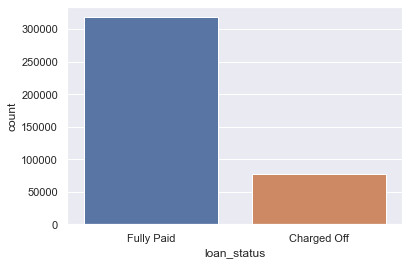

In [12]:
sns.countplot(x = 'loan_status', data=df) 
# imbalanced data set. we might achieve high accuracy but our precision and recall 
# might not be that great

### histogram of the loan amount column

<AxesSubplot:xlabel='loan_amnt'>

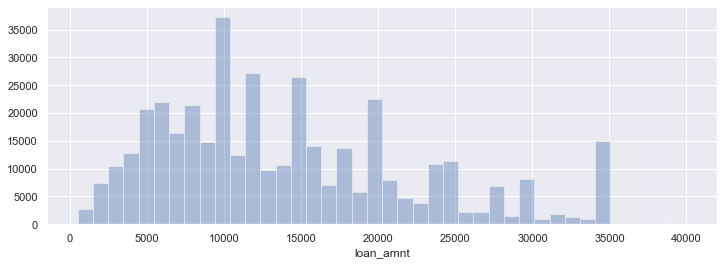

In [13]:
plt.figure(figsize = (12,4))
sns.distplot(df['loan_amnt'],kde = False,bins = 40)
#we see the spikes in loan amnts that are even numbers. it clearly indicates that certain loan amounts are basically standard
#loans

In [14]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

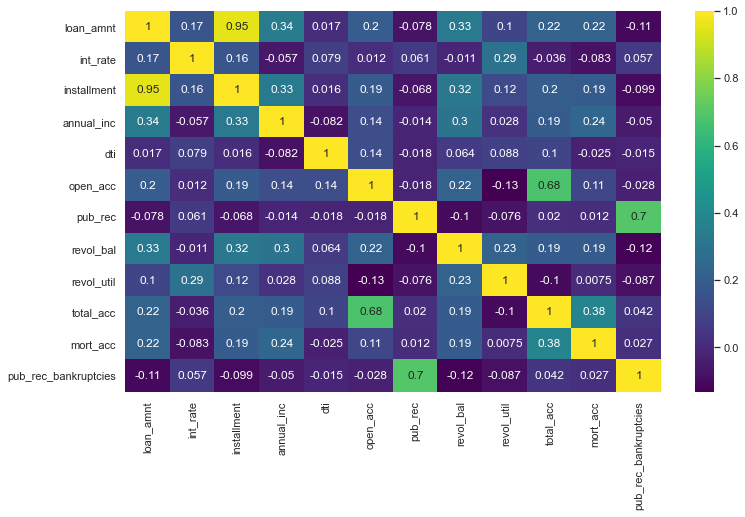

In [15]:
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(),annot = True,cmap = 'viridis')


In [16]:
feat_info("installment")

The monthly payment owed by the borrower if the loan originates.


In [17]:
feat_info("loan_amnt")

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [18]:
#they are highly correlated.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

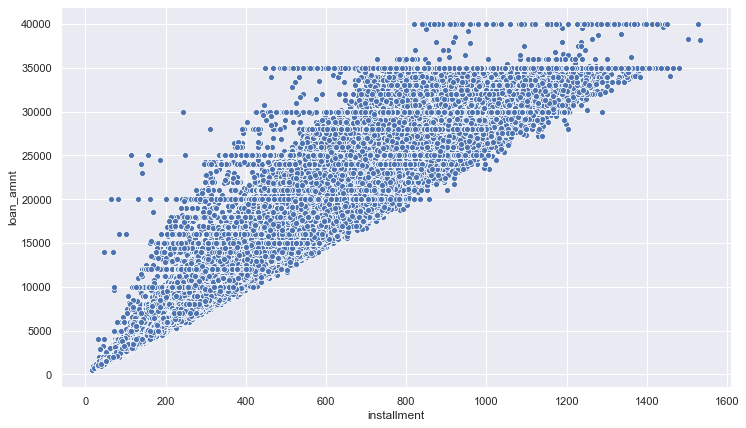

In [19]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = "installment", y ="loan_amnt",data = df,alpha = 1,)

In [20]:
# box plot between loan status and the loan amount

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

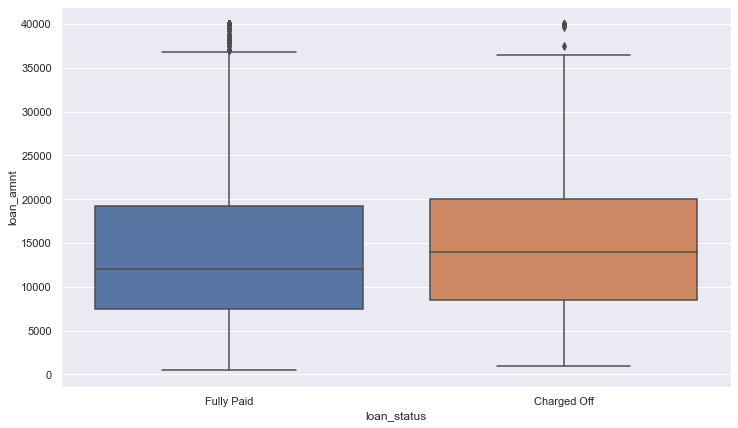

In [21]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'loan_status', y = 'loan_amnt',data =df)

In [22]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [23]:
# A charge-off or chargeoff is a declaration by a creditor that an amount of debt is unlikely to be collected. 
# This occurs when a consumer becomes severely delinquent on a debt. 
# Traditionally, creditors make this declaration at the point of six months without payment. A charge-off is a form of write-off.

In [24]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [25]:
  df['sub_grade'].unique()  

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

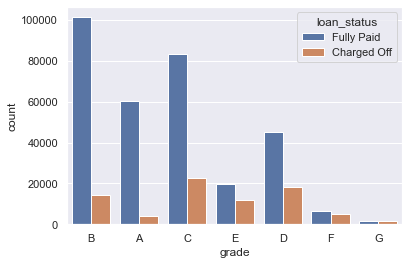

In [26]:
sns.countplot(x = 'grade',data = df,hue ='loan_status' )

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

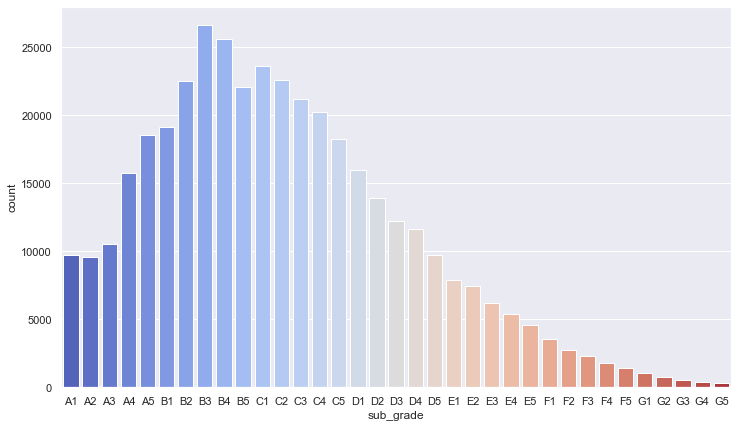

In [27]:
plt.figure(figsize = (12,7))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df,order = subgrade_order,palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

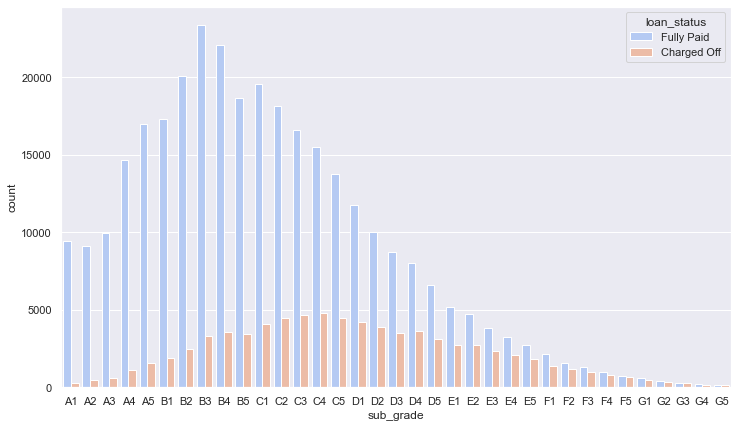

In [28]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'sub_grade', data = df,order = subgrade_order,palette='coolwarm',hue = 'loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

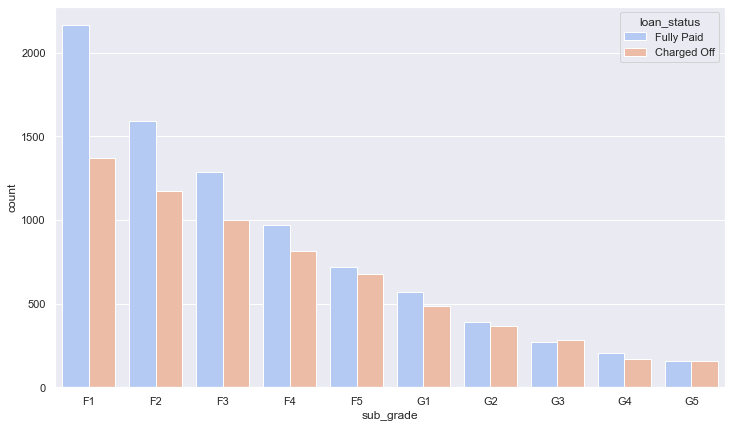

In [29]:
grades = ['F','G']
f_and_g = df.query('grade==@grades')
plt.figure(figsize = (12,7))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = f_and_g,order = subgrade_order,palette='coolwarm', hue = 'loan_status')

In [30]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
# we create a new column where we assign boolean values to fully paid and charged off
# we use map function

In [31]:
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


<AxesSubplot:>

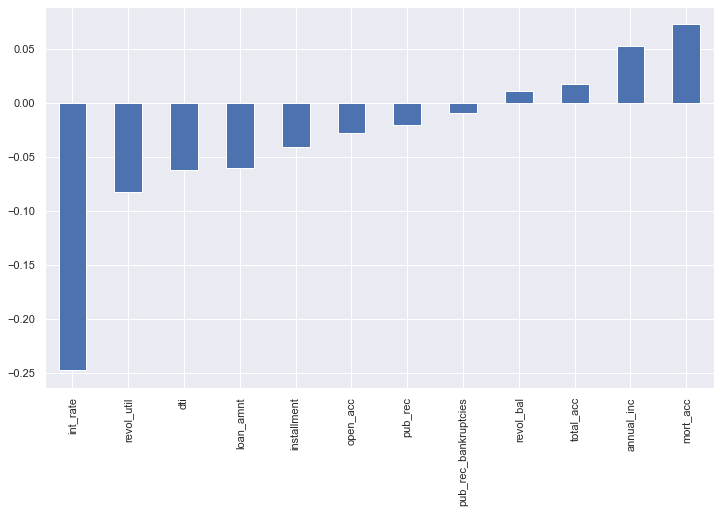

In [32]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar',figsize = (12,7))
# interest rate is negatively correlated with loan repaid. that makes sense coz higher the interest rate, the more difficult 
# is to repay the loan

## Data Pre processing

In [33]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [34]:
len(df)

396030

In [35]:

pd.set_option("display.max_rows",1000,"display.max_columns",1000)
df.isnull().sum()

loan_amnt               0    
term                    0    
int_rate                0    
installment             0    
grade                   0    
sub_grade               0    
emp_title               22927
emp_length              18301
home_ownership          0    
annual_inc              0    
verification_status     0    
issue_d                 0    
loan_status             0    
purpose                 0    
title                   1755 
dti                     0    
earliest_cr_line        0    
open_acc                0    
pub_rec                 0    
revol_bal               0    
revol_util              276  
total_acc               0    
initial_list_status     0    
application_type        0    
mort_acc                37795
pub_rec_bankruptcies    535  
address                 0    
loan_repaid             0    
dtype: int64

In [36]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [37]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [38]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [39]:
df['emp_title'].nunique()

173105

In [40]:
df['emp_title'].value_counts()
# there are way too many titles to convert them into dummy variables
# it will lead to curse of dimensionality

Teacher                                    4389
Manager                                    4250
Registered Nurse                           1856
RN                                         1846
Supervisor                                 1830
                                           ... 
Modified Polymer Components, Inc.          1   
abs global                                 1   
Information Management Specialist          1   
Supervisory Explosive Specialist           1   
Town of mamaroneck/larchmont sanitation    1   
Name: emp_title, Length: 173105, dtype: int64

In [41]:
df = df.drop('emp_title',axis = 1)

In [42]:
df['emp_length'].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [43]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [44]:
emp_length_order = ['< 1 year','1 year',
 
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

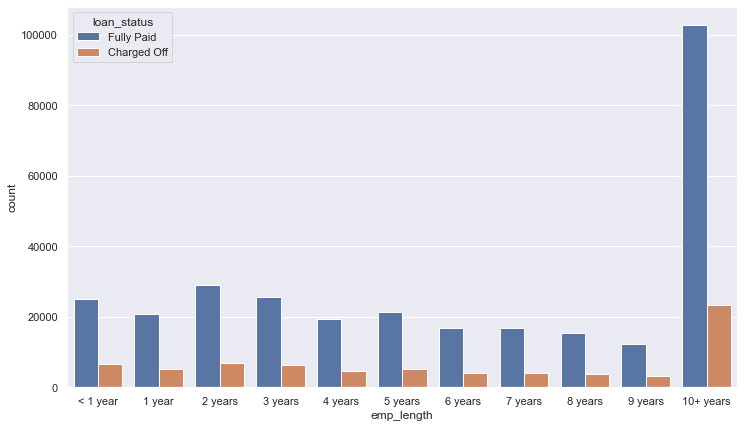

In [45]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'emp_length',data = df,order = emp_length_order,hue = 'loan_status' )

In [46]:
emp_co = df.query('loan_status=="Charged Off"').groupby("emp_length").count()['loan_status']
emp_fp = df.query('loan_status=="Fully Paid"').groupby("emp_length").count()['loan_status']

In [47]:
emp_len = emp_co/(emp_co + emp_fp)

<AxesSubplot:xlabel='emp_length'>

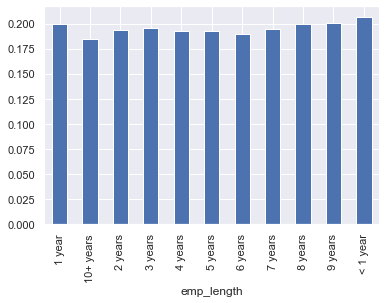

In [48]:
emp_len.plot(kind = 'bar')

In [49]:
df = df.drop('emp_length',axis = 1)

In [50]:
df.isnull().sum()

loan_amnt               0    
term                    0    
int_rate                0    
installment             0    
grade                   0    
sub_grade               0    
home_ownership          0    
annual_inc              0    
verification_status     0    
issue_d                 0    
loan_status             0    
purpose                 0    
title                   1755 
dti                     0    
earliest_cr_line        0    
open_acc                0    
pub_rec                 0    
revol_bal               0    
revol_util              276  
total_acc               0    
initial_list_status     0    
application_type        0    
mort_acc                37795
pub_rec_bankruptcies    535  
address                 0    
loan_repaid             0    
dtype: int64

In [51]:
feat_info('title')

The loan title provided by the borrower


In [52]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [53]:
df['purpose'].head()

0    vacation          
1    debt_consolidation
2    credit_card       
3    credit_card       
4    credit_card       
Name: purpose, dtype: object

In [54]:
df['title'].head()

0    Vacation               
1    Debt consolidation     
2    Credit card refinancing
3    Credit card refinancing
4    Credit Card Refinance  
Name: title, dtype: object

In [55]:
df = df.drop('title',axis = 1)

In [56]:
df.isnull().sum()

loan_amnt               0    
term                    0    
int_rate                0    
installment             0    
grade                   0    
sub_grade               0    
home_ownership          0    
annual_inc              0    
verification_status     0    
issue_d                 0    
loan_status             0    
purpose                 0    
dti                     0    
earliest_cr_line        0    
open_acc                0    
pub_rec                 0    
revol_bal               0    
revol_util              276  
total_acc               0    
initial_list_status     0    
application_type        0    
mort_acc                37795
pub_rec_bankruptcies    535  
address                 0    
loan_repaid             0    
dtype: int64

In [57]:
feat_info('mort_acc')
# mort_acc is 10% of the data. we can't simply drop 10% of the data

Number of mortgage accounts.


In [58]:
df['mort_acc'].value_counts()

0.0     139777
1.0     60416 
2.0     49948 
3.0     38049 
4.0     27887 
5.0     18194 
6.0     11069 
7.0     6052  
8.0     3121  
9.0     1656  
10.0    865   
11.0    479   
12.0    264   
13.0    146   
14.0    107   
15.0    61    
16.0    37    
17.0    22    
18.0    18    
19.0    15    
20.0    13    
24.0    10    
22.0    7     
21.0    4     
25.0    4     
27.0    3     
23.0    2     
32.0    2     
26.0    2     
31.0    2     
30.0    1     
28.0    1     
34.0    1     
Name: mort_acc, dtype: int64

In [59]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [60]:
total_acc_avg = df.groupby("total_acc").mean()['mort_acc']

In [61]:
total_acc_avg.head()

total_acc
2.0    0.000000
3.0    0.052023
4.0    0.066743
5.0    0.103289
6.0    0.151293
Name: mort_acc, dtype: float64

In [62]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        
        return total_acc_avg[total_acc]
    else:
        
        return mort_acc

In [63]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis = 1)

In [64]:
df.isnull().sum()

loan_amnt               0  
term                    0  
int_rate                0  
installment             0  
grade                   0  
sub_grade               0  
home_ownership          0  
annual_inc              0  
verification_status     0  
issue_d                 0  
loan_status             0  
purpose                 0  
dti                     0  
earliest_cr_line        0  
open_acc                0  
pub_rec                 0  
revol_bal               0  
revol_util              276
total_acc               0  
initial_list_status     0  
application_type        0  
mort_acc                0  
pub_rec_bankruptcies    535
address                 0  
loan_repaid             0  
dtype: int64

In [65]:
df = df.dropna()

In [66]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [67]:
df.select_dtypes(['int64']).columns

Index(['loan_repaid'], dtype='object')

In [68]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [69]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [70]:
df['term'].value_counts()

 36 months    301247
 60 months    93972 
Name: term, dtype: int64

### converting categorical strings into categorical numerical

In [71]:
df['term'].apply(len)

0         10
1         10
2         10
3         10
4         10
          ..
396025    10
396026    10
396027    10
396028    10
396029    10
Name: term, Length: 395219, dtype: int64

In [72]:
df['term'].apply(len).value_counts()

10    395219
Name: term, dtype: int64

In [73]:
df['term'].head(5)

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [74]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [75]:
df['term'].value_counts()

36    301247
60    93972 
Name: term, dtype: int64

## grade_feature

In [76]:
df= df.drop('grade',axis = 1)

In [77]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True) #drop_first to prevent duplicate info i.e dummy trap

In [78]:
df = pd.concat([df.drop('sub_grade',axis = 1),dummies],axis = 1)

In [79]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [80]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis = 1),dummies],axis = 1)

In [81]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN         37660 
OTHER       110   
NONE        29    
ANY         3     
Name: home_ownership, dtype: int64

In [82]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [83]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN         37660 
OTHER       142   
Name: home_ownership, dtype: int64

In [84]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df=  pd.concat([df.drop('home_ownership',axis = 1),dummies],axis = 1)

In [85]:
df['address']

0         0174 Michelle Gateway\r\nMendozaberg, OK 22690        
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113     
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113     
3         823 Reid Ford\r\nDelacruzside, MA 00813               
4         679 Luna Roads\r\nGreggshire, VA 11650                
                           ...                                  
396025    12951 Williams Crossing\r\nJohnnyville, DC 30723      
396026    0114 Fowler Field Suite 028\r\nRachelborough, LA 05113
396027    953 Matthew Points Suite 414\r\nReedfort, NY 70466    
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL 29597  
396029    787 Michelle Causeway\r\nBriannaton, AR 48052         
Name: address, Length: 395219, dtype: object

In [86]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [87]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [88]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop('zip_code',axis = 1),dummies],axis = 1)

In [89]:
df = df.drop('address',axis = 1)

## issue_d

In [90]:
feat_info('issue_d')

The month which the loan was funded


In [91]:
df = df.drop('issue_d',axis = 1)

In [92]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',


In [93]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [94]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [95]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [96]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

## Train Test Split

In [97]:
df[['loan_status','loan_repaid']].head()

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0


In [98]:
df = df.drop('loan_status',axis =1)

In [99]:
X = df.drop('loan_repaid',axis = 1).values
y = df['loan_repaid'].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [101]:
scaler = MinMaxScaler()

In [102]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)# we don't fit_transform to prevent data leakage

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [104]:
X_train.shape

(316175, 78)

In [105]:
model = Sequential()

model.add(Dense(78,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1,activation = 'sigmoid')) #coz it's a binary classification

model.compile(loss = 'binary_crossentropy',optimzer = 'adam')



In [106]:
model.fit(x = X_train,y = y_train, epochs = 25, batch_size = 256, validation_data=(X_test,y_test))

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 11s 35us/sample - loss: 0.2960 - val_loss: 0.2664
Epoch 2/25
316175/316175 [==============================] - 9s 27us/sample - loss: 0.2658 - val_loss: 0.2649
Epoch 3/25
316175/316175 [==============================] - 9s 28us/sample - loss: 0.2639 - val_loss: 0.2653
Epoch 4/25
316175/316175 [==============================] - 8s 27us/sample - loss: 0.2635 - val_loss: 0.2654
Epoch 5/25
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2634 - val_loss: 0.2640
Epoch 6/25
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2632 - val_loss: 0.2645
Epoch 7/25
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2633 - val_loss: 0.2652
Epoch 8/25
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2633 - val_loss: 0.2646
Epoch 9/25
316175/316175 [==============================] - 6s 20us/sample -

In [107]:
from tensorflow.keras.models import load_model


In [108]:
model.save("myfavmodel.h5")

## Evaluation

In [109]:
losses = pd.DataFrame(model.history.history)

In [110]:
losses

,loss,val_loss
0,0.295953,0.266359
1,0.265808,0.264866
2,0.263898,0.265270
3,0.263465,0.265371
4,0.263372,0.264035
5,0.263157,0.264517
6,0.263277,0.265212
7,0.263279,0.264574
8,0.263032,0.264724
9,0.263184,0.264395


<AxesSubplot:>

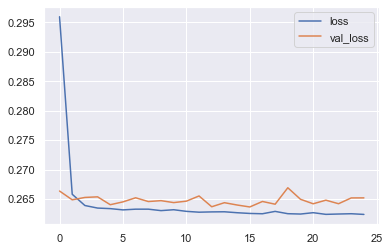

In [113]:

losses.plot()

In [115]:
predictions = model.predict_classes(X_test)

In [117]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [118]:
print(confusion_matrix(y_test,predictions))

[[ 6970  8688]
 [  193 63193]]


In [119]:
#we should not fooled by the high accuracy . this is an imbalanced data set.


In [120]:
# f1 is the harmonic mean of precision and recall

In [121]:
import random

random.seed(101)

random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis = 1).iloc[random_ind]
new_customer

loan_amnt                              25000.00
term                                   60.00   
int_rate                               18.24   
installment                            638.11  
annual_inc                             61665.00
dti                                    30.11   
earliest_cr_line                       1996.00 
open_acc                               16.00   
pub_rec                                0.00    
revol_bal                              27778.00
revol_util                             65.50   
total_acc                              46.00   
mort_acc                               0.00    
pub_rec_bankruptcies                   0.00    
A2                                     0.00    
A3                                     0.00    
A4                                     0.00    
A5                                     0.00    
B1                                     0.00    
B2                                     0.00    
B3                                     0

In [131]:
new_customer  = scaler.transform(new_customer.values.reshape(1,78))

In [132]:
model.predict_classes(new_customer)

array([[1]])

In [133]:
df.iloc[random_ind]['loan_repaid']

1.0

## the random person actually ended up paying the loan